In [2]:
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [8]:
PROJECT_ROOT_DIR = "./"
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

In [9]:
import pandas as pd

def load_gpp_data():
    csv_path = os.path.join("practice/", "gpp.csv")
    return pd.read_csv(csv_path)

In [10]:
gpp = load_gpp_data()
gpp.head()

,id,date,blue_r,green_r,red_r,nir_r,ndvi,evi,gci,gpp
0,1,20160813T190352,0.093305,0.086418,0.060239,0.381722,0.727399,0.770298,3.417147,31.429468
1,2,20161211T190342,0.101071,0.079536,0.059990,0.115804,0.317495,0.194416,0.455985,4.077585
2,3,20161221T185802,0.113617,0.098989,0.065555,0.253848,0.589517,0.592083,1.564407,3.182831
3,4,20161231T185802,0.257440,0.227195,0.221189,0.289834,0.134328,0.250102,0.275701,2.320963
4,5,20170110T185742,0.624552,0.578988,0.602755,0.590947,-0.009893,-0.056411,0.020654,2.415024


In [11]:
gpp.describe()

,id,blue_r,green_r,red_r,nir_r,ndvi,evi,gci,gpp
count,164.00000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,82.50000,0.192986,0.179412,0.168978,0.381131,0.478172,0.529022,1.974639,15.093590
std,47.48684,0.184982,0.173202,0.192347,0.140235,0.264662,0.303161,1.400790,11.671465
min,1.00000,0.080590,0.065033,0.039392,0.115804,-0.019553,-0.108187,0.015843,-4.533754
25%,41.75000,0.098449,0.088790,0.059908,0.284952,0.304040,0.300762,0.813510,5.732366
50%,82.50000,0.111581,0.106209,0.091131,0.364461,0.520608,0.502419,1.794190,12.224048
75%,123.25000,0.152569,0.140667,0.147409,0.426190,0.715973,0.813710,3.214973,24.632592
max,164.00000,1.016839,0.967608,1.023207,1.048060,0.856241,1.241520,5.595987,44.934000


Saving figure gpphistogram_plots


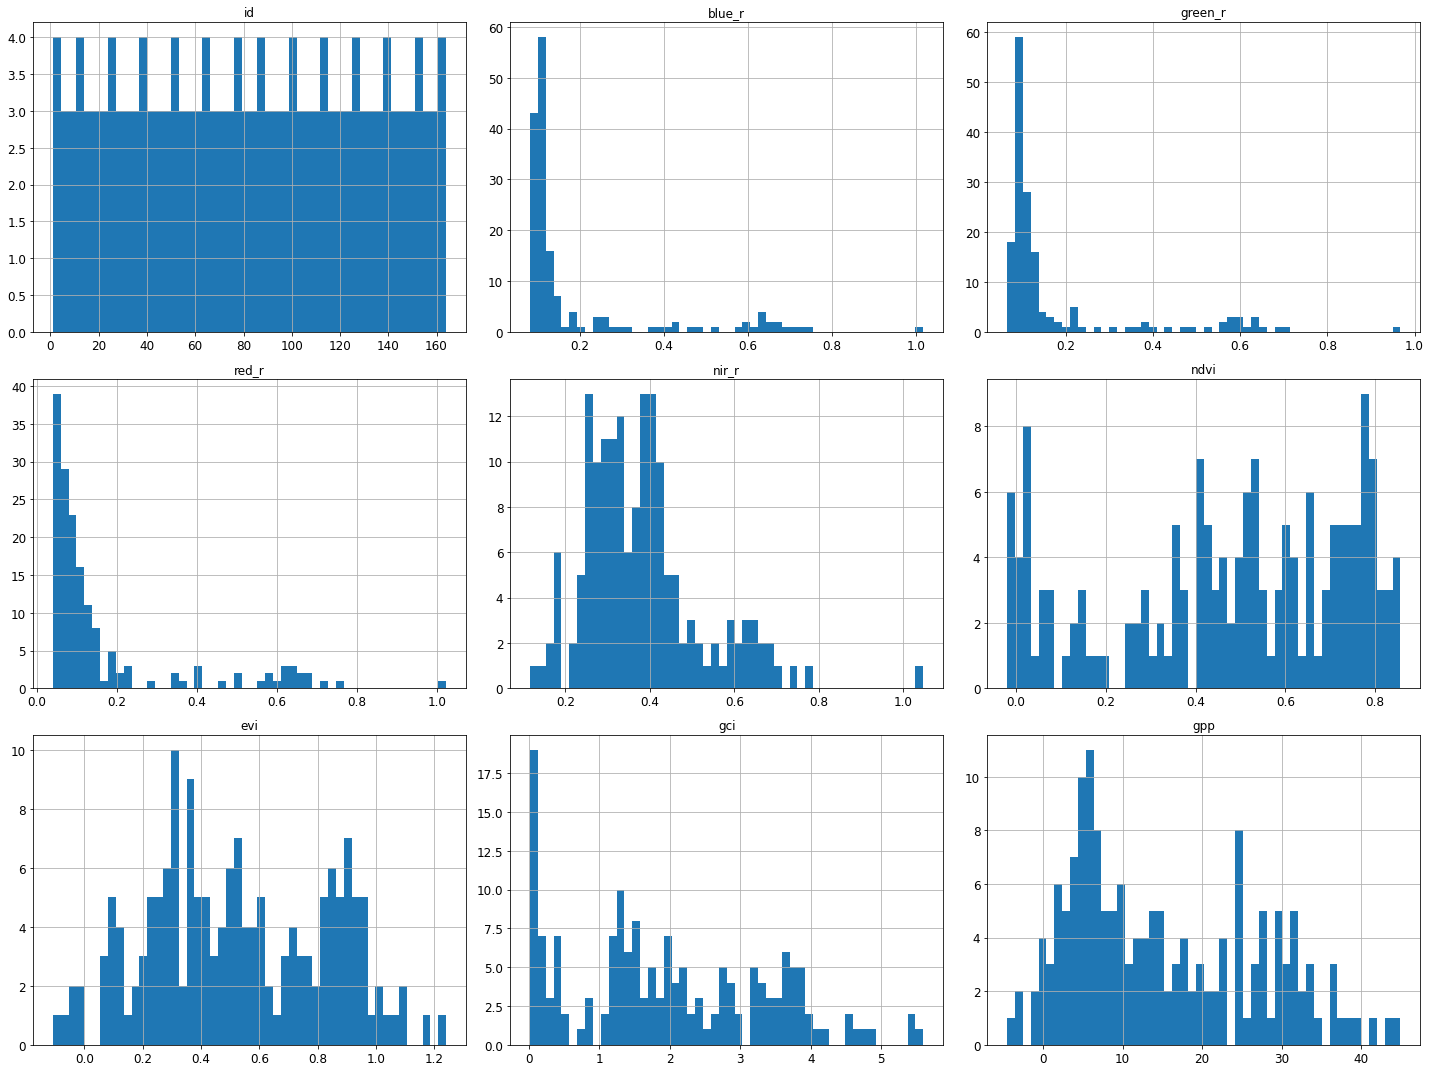

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
gpp.hist(bins=50, figsize=(20,15))
save_fig("gpphistogram_plots")
plt.show()

In [13]:
#Splitting data into training and testing data
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [14]:
train_set, test_set = split_train_test(gpp, 0.2)
len(train_set)

132

In [15]:
len(test_set)


32

In [16]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [17]:
train_set, test_set = split_train_test_by_id(gpp, 0.2, "id")

In [18]:
test_set.head()

,id,date,blue_r,green_r,red_r,nir_r,ndvi,evi,gci,gpp
1,2,20161211T190342,0.101071,0.079536,0.059990,0.115804,0.317495,0.194416,0.455985,4.077585
4,5,20170110T185742,0.624552,0.578988,0.602755,0.590947,-0.009893,-0.056411,0.020654,2.415024
11,12,20170331T184921,0.081828,0.080605,0.039392,0.462795,0.843118,0.975188,4.741531,28.276044
15,16,20170510T184921,0.096240,0.100823,0.056712,0.476373,0.787230,0.958261,3.724857,36.462342
22,23,20170808T190351,0.113299,0.114728,0.124625,0.317575,0.436342,0.396829,1.768064,16.596681


In [19]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(gpp, test_size=0.2, random_state=42)

In [20]:
test_set.head()

,id,date,blue_r,green_r,red_r,nir_r,ndvi,evi,gci,gpp
135,136,20200623T184921,0.102015,0.100974,0.087548,0.380482,0.625886,0.642028,2.768122,24.906392
115,116,20191007T185251,0.096238,0.093612,0.059663,0.406708,0.744139,0.831922,3.344602,22.351356
131,132,20200514T184921,0.657656,0.628629,0.667718,0.686624,0.013959,0.062146,0.092256,30.258915
55,56,20180321T185039,0.691164,0.644649,0.683473,0.680487,-0.002189,-0.012490,0.055593,10.114216
95,96,20190209T185531,0.233833,0.209664,0.209429,0.284571,0.152110,0.238578,0.357277,3.136474
